In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# Load Model 
model = tf.keras.models.load_model('/home/yamuna/ANPR/models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [4]:
path = '/home/yamuna/ANPR/test_images/210.jpeg'
image = load_img(path)
image = np.array(image,dtype=np.uint8) # 8 bit array 
image1 = load_img(path,target_size=(224,224))
# Convert into array and get the normalized output
image_arr_224 = img_to_array(image1)/255.0  

In [5]:
# Size of the original image 
h,w,d = image.shape
print('Height of the Image =',h)
print('Width of the Image =',w)

Height of the Image = 183
Width of the Image = 275


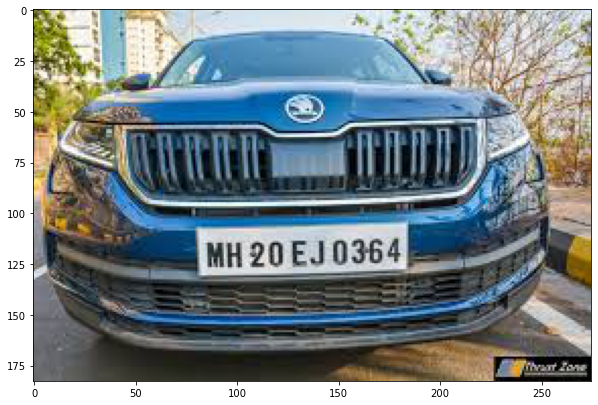

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
coords = model.predict(test_arr)
coords

array([[9.8440295e-01, 2.1941543e-02, 3.5679340e-04, 5.5303466e-12]],
      dtype=float32)

In [10]:
# Denormalize the values 
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[2.70710813e+02, 6.03392422e+00, 6.52931929e-02, 1.01205342e-09]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[270,   6,   0,   0]], dtype=int32)

# Bounding box 

(270, 0) (6, 0)


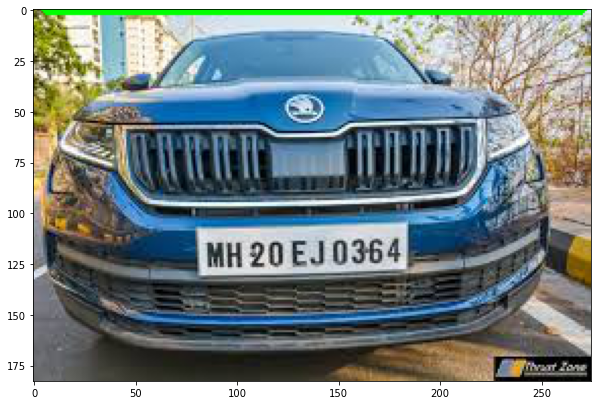

In [12]:
# draw bounding on the top of the image 
xmin,xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Create pipeline 

In [13]:
path = '/home/yamuna/ANPR/test_images/210.jpeg'
def object_detection(path):
    # Read the image 
    image = load_img(path)
    image = np.array(image,dtype=np.uint8) # 8 bit array 
    image1 = load_img(path,target_size=(224,224))
    # Data Preprocessing 
    image_arr_224 = img_to_array(image1)/255.0  
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1, 224,224,3)
    # make Predictions 
    coords = model.predict(test_arr)
    coords
    # Denormalize the values 
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords 
    coords = coords.astype(np.int32)
    coords
    # draw bounding on top of the image 
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords
    

In [14]:
path = '/home/yamuna/ANPR/test_images/210peg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/yamuna/ANPR/test_images/210peg'

## Optical character Recognition-OCR

In [ ]:
import pytesseract as pt

In [ ]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

In [ ]:
plt.imshow(roi)
plt.show()

## Extract text from Image

In [ ]:
text = pt.image_to_string(roi)
print(text)